# Ice-albedo feedback and Snowball Earth in the EBM

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

____________
## 1. Review of the 1D EBM
____________

Last time we derived the equation for the one-dimensional EBM with diffusive heat transport:

$$ C \frac{\partial T}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right) $$


We have chosen the following parameter values, which seems to give a reasonable fit to the observed **annual mean temperature and energy budget**:

- $ A = 210 ~ \text{W m}^{-2}$ (emission at 0$^\circ$C)
- $ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (increase in emission per degree, related to net longwave climate feedback)
- $ D = 0.6 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (thermal diffusivity of the climate system)

We looked at the adjustment of this model to equilibrium, with annual mean insolation $\overline{Q(\phi)}$ and specified albedo $\alpha(\phi)$ (giving a reasonable fit to observations).

We also tuned the diffuvisity $D$ so that our annual mean solution has a reasonable pole-to-equator temperature gradient and peak poleward heat transport.

Actually for the new version of this model with interactive ice line, we are going to reduce the diffusivity down to $ D = 0.55 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $.

____________
## 2. Interactive snow/ice line in the EBM
____________

What we want to do today is introduce another process into our model: an **interactive snow and ice line**. 

The idea is simply that, as the climate gets warmer, the snow and ice will retreat poleward, and the planetary albedo will decrease (or vice-versa).

We modeled this in the zero-dimensional model by using a kind of ramp function for the global mean albedo as a function of global mean temperature.

Here, since our model resolves temperature at each latitude, we want to do something more physical: *suppose that the surface is covered in ice and snow wherever the temperature is below some threshold $T_f$.*

### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f  & \text{(no ice)} \\
a_i & ~ & T(\phi) \le T_f & \text{(ice-covered)} \\
\end{array} \right. $$

where $P_2(\sin\phi) = \frac{1}{2}\left( 3\left(\sin\phi\right)^2 - 1 \right) $ is called the *second Legendre Polynomial* (just a mathematically convenient description of a smooth variation between the equator and pole).

Empirically, we follow classic work by {cite:t}`Budyko:1969fm` and set the threshold temperature

$$ T_f = -10^\circ\text{C} $$

This is known as a "step function" formula, because the value of $\alpha$ steps or jumps up to a higher value as we cross the ice line.

____________
## 3. Solving the EBM with variable snow/ice line in CLIMLAB
____________

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

In [2]:
#  for convenience, set up a dictionary with our reference parameters
param = {'D':0.55, 'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180, 
                            D=0.55, 
                            A=210., 
                            B=2., 
                            Tf=-10., 
                            a0=0.3, 
                            a2=0.078, 
                            ai=0.62)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
EBM with interactive ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



Because we provided a parameter `ai` for the icy albedo, our model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$.

In [3]:
print(model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210.0, 'B': 2.0, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [4]:
#  A python shortcut... we can use the dictionary to pass lots of input arguments simultaneously:

#  same thing as before, but written differently:
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,
                            **param)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
EBM with interactive ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



In [5]:
def ebm_plot(e, return_fig=False):    
    templimits = -60,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=(8,12))

    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(e.lat, e.Ts)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (°C)')
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(e.lat, e.ASR, 'k--', label='SW' )
    ax2.plot(e.lat, -e.OLR, 'r--', label='LW' )
    ax2.plot(e.lat, e.net_radiation, 'c-', label='net rad' )
    ax2.plot(e.lat, e.heat_transport_convergence, 'g--', label='dyn' )
    ax2.plot(e.lat, e.net_radiation + e.heat_transport_convergence, 'b-', label='total' )
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(e.lat_bounds, e.heat_transport )
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    
    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel('Latitude')
        ax.set_xlim(latlimits)
        ax.set_xticks(lat_ticks)
        ax.grid()
    
    if return_fig:
        return fig

In [6]:
model1.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


Diagnostics in this model are mostly on the latitude axis, e.g.:

In [7]:
model1.ASR.to_xarray()

<xarray.DataArray (depth: 1, lat: 180)> Size: 1kB
Field([[ 65.71797533,  65.76244815,  65.84761904,  65.97923937,
         66.15142104,  66.36917776,  66.63263704,  66.93823592,
         67.2910667 ,  67.69112601,  68.13642192,  68.63061992,
         69.17502064,  69.76984994,  70.41686003,  71.11806553,
         71.8766754 ,  72.69521702,  73.57685571,  74.52622406,
        126.5151735 , 128.64225662, 130.94704321, 133.4799311 ,
        136.31700247, 139.35073236, 142.52593606, 145.81221046,
        149.18851573, 152.63894184, 156.15081983, 159.71369723,
        163.31871561, 166.9582033 , 170.62539457, 174.3142284 ,
        178.01919988, 181.73524799, 185.45766933, 189.1820507 ,
        192.90421597, 196.62018373, 200.32613334, 204.01837763,
        207.69334083, 211.3475408 , 214.97757473, 218.58010762,
        222.15186324, 225.68961698, 229.19019037, 232.6504471 ,
        236.06729007, 239.43765961, 242.75853253, 246.02692181,
        249.23987716, 252.39448586, 255.48787433, 258.51720991,
        261.47970311, 264.37261007, 267.19323534, 269.93893481,
        272.60711881, 275.19525537, 277.70087357, 280.12156692,
        282.45499686, 284.69889616, 286.8510725 , 288.9094118 ,
        290.87188171, 292.73653488, 294.50151227, 296.16504627,
        297.72546377, 299.18118908, 300.5307467 , 301.77276399,
...
        301.77276406, 300.53074678, 299.18118916, 297.72546386,
        296.16504637, 294.50151238, 292.73653499, 290.87188183,
        288.90941193, 286.85107263, 284.6988963 , 282.454997  ,
        280.12156707, 277.70087372, 275.19525553, 272.60711897,
        269.93893498, 267.19323552, 264.37261025, 261.4797033 ,
        258.51721011, 255.48787453, 252.39448606, 249.23987736,
        246.02692203, 242.75853274, 239.43765984, 236.06729029,
        232.65044733, 229.19019061, 225.68961722, 222.15186349,
        218.58010787, 214.97757498, 211.34754106, 207.69334109,
        204.01837789, 200.32613361, 196.620184  , 192.90421625,
        189.18205098, 185.45766961, 181.73524828, 178.01920017,
        174.31422869, 170.62539486, 166.95820359, 163.31871591,
        159.71369753, 156.15082013, 152.63894214, 149.18851604,
        145.81221077, 142.52593637, 139.35073267, 136.31700278,
        133.47993141, 130.94704352, 128.64225694, 126.51517382,
         74.52622425,  73.57685591,  72.69521721,  71.87667559,
         71.11806573,  70.41686023,  69.76985014,  69.17502084,
         68.63062012,  68.13642212,  67.69112621,  67.2910669 ,
         66.93823612,  66.63263724,  66.36917797,  66.15142124,
         65.97923958,  65.84761924,  65.76244835,  65.71797553]])
Coordinates:
  * depth    (depth) float64 8B 5.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

There is a built-in utility to take properly area-weighted global averages!

This gives us the net global energy imbalance:

In [8]:
climlab.global_mean(model1.ASR - model1.OLR)

array(0.02589604)

There is also a built-in diagnostic `net_radiation` that has the same information (i.e. ASR - OLR):

In [9]:
climlab.global_mean(model1.net_radiation)

array(0.02589604)

Since it's not fully equilibrated yet, we can run it out a little longer:

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 9.999999999999863 years.
1.2815863496433792e-05


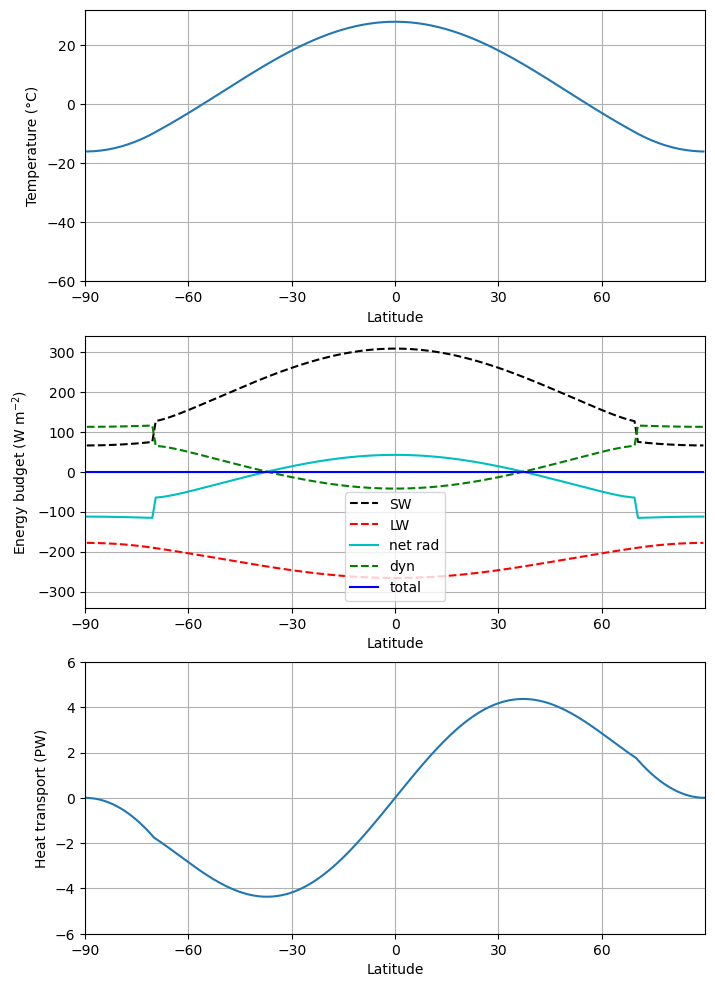

In [10]:
# Integrate out to equilibrium.
model1.integrate_years(5)
#  Check for energy balance
print(climlab.global_mean(model1.net_radiation))
f = ebm_plot(model1)

In [11]:
#  There is a diagnostic that tells us the current location of the ice edge:
model1.icelat

array([-70.,  70.])

This model is tuned up to reasonable "present-day" conditions.

____________
## 4. Polar-amplified warming in the EBM
____________

### Add a small radiative forcing

The equivalent of doubling CO2 in this model is something like 

$$ A \rightarrow A - \delta A $$

where $\delta A = 4$ W m$^{-2}$.



In [12]:
model1.subprocess['LW'].A

210

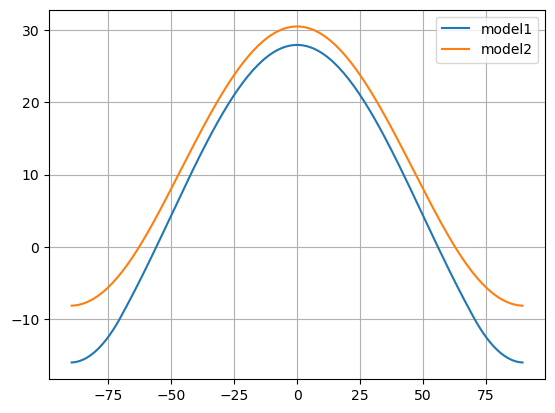

In [13]:
deltaA = 4.

#  This is a very handy way to "clone" an existing model:
model2 = climlab.process_like(model1)

#  Now change the longwave parameter:
model2.subprocess['LW'].A = param['A'] - deltaA
#  and integrate out to equilibrium again
model2.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.legend(); plt.grid()

**The warming is polar-amplified**:  more warming at the poles than elsewhere.

Why?

Also, the current ice line is now:

In [14]:
model2.icelat

array([-90.,  90.])

There is no ice left!

Let's do some more greenhouse warming:

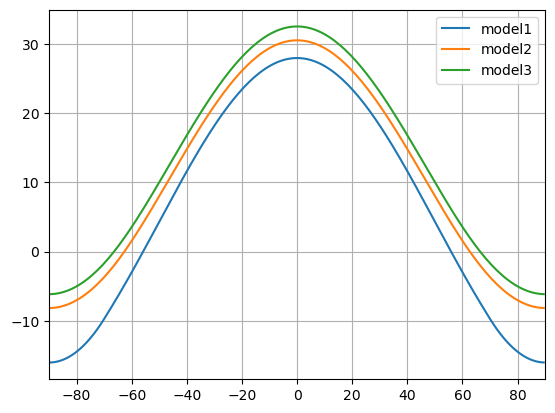

In [15]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.plot(model3.lat, model3.Ts, label='model3')
plt.xlim(-90, 90)
plt.grid()
plt.legend()

In the ice-free regime, there is no polar-amplified warming. A uniform radiative forcing produces a uniform warming.

____________
## 5. A different kind of climate forcing: changing the solar constant
____________

Historically EBMs have been used to study the climatic response to a change in the energy output from the Sun.

We can do that easily with `climlab`:

In [16]:
m = climlab.EBM_annual(num_lat=180, **param)
#  The current (default) solar constant, corresponding to present-day conditions:
m.subprocess.insolation.S0

1365.2

###  What happens if we decrease $S_0$?

In [17]:
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 5.000000000000044 years.


array(0.02589604)

In [18]:
m.icelat

array([-70.,  70.])

In [19]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1300.

In [20]:
#  Integrate to new equilibrium
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 14.999999999999647 years.


array(-0.00013379)

In [21]:
m.icelat

array([-54.,  54.])

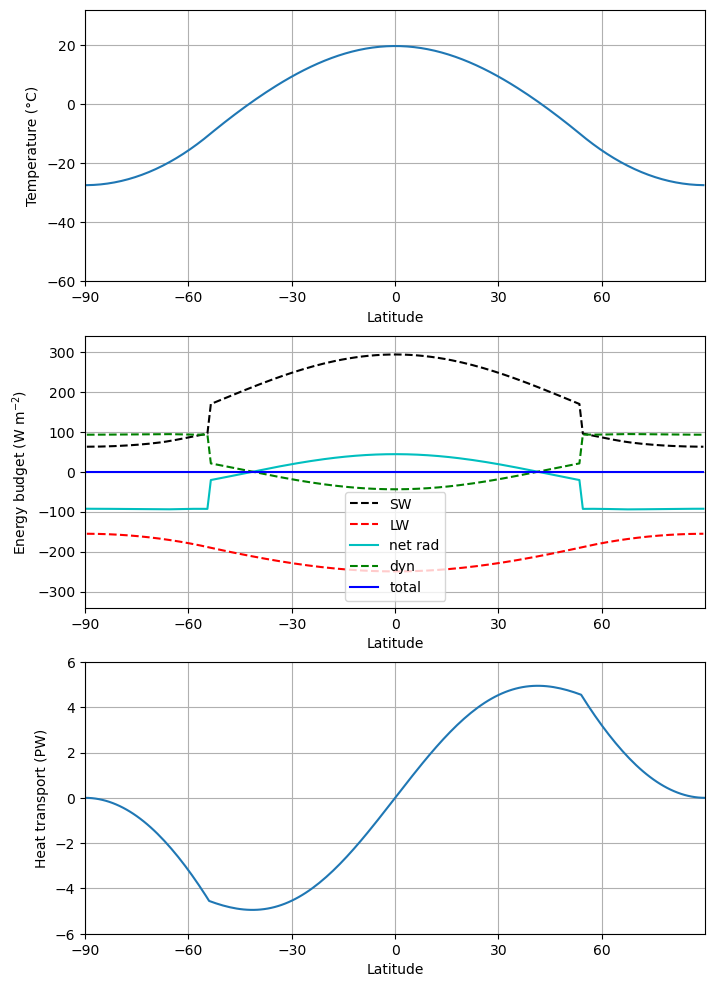

In [22]:
ebm_plot(m)

A much colder climate!  The ice line is sitting at 54º. The heat transport shows that the atmosphere is moving lots of energy across the ice line, trying hard to compensate for the strong radiative cooling everywhere poleward of the ice line.

____________
## 6. The large ice cap instability
____________

###  What happens if we decrease $S_0$ even more?


In [23]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1200.
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 19.99999999999943 years.


array(-5.13788963)

In [24]:
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 30.000000000000693 years.


array(-1.25838372e-06)

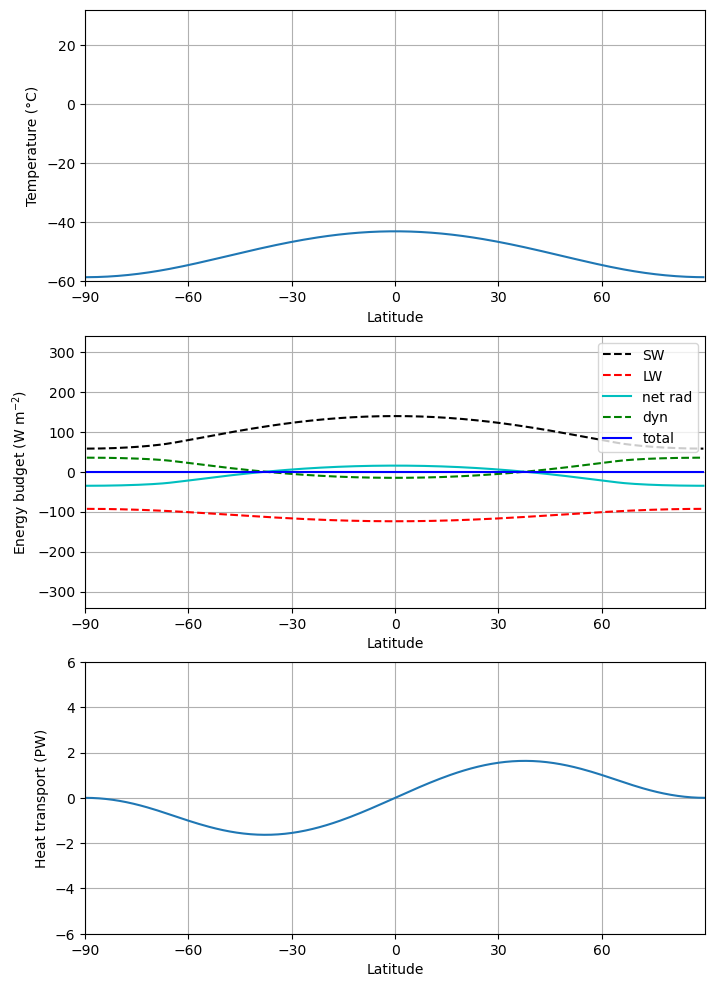

In [25]:
ebm_plot(m)

Something very different happened! Where is the ice line now?

In [26]:
m.icelat

array([-0.,  0.])

### Now what happens if we set $S_0$ back to its present-day value?

In [27]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1365.2
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 35.0000000000016 years.


array(0.00790051)

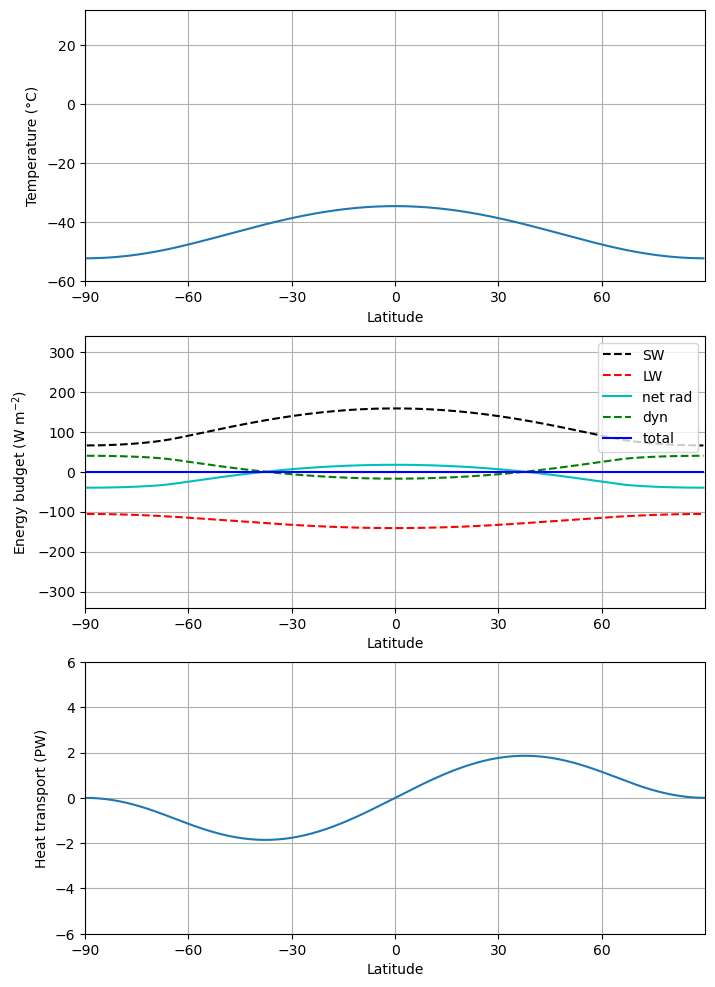

In [28]:
ebm_plot(m)

Is this the same climate we started with?

This is an example of a **hysteresis** in the climate system:  the state of the climate depends on its history!

- A global cooling caused snow and ice to expand to the equator
- External conditions (i.e. the solar constant) returned back to its present-day value
- The climate stayed cold and completely ice-covered.

If the oceans froze over and the Earth were covered in ice and snow today, it would remain that way!

____________
## 7. The Neoproterozoic Snowball Earth
____________

### The Geologic Time Scale

First, some information on the nomenclature for Earth history {cite:p}`GeoTimeScale:2009`:

![Geological Time Scale](../images/GeoTimeScale2009.png)

The long view of glacial epochs on Earth {cite:p}`Hoffman:2017a`:

![Hoffman et al. (2017) Sci. Adv. Figure 2](../images/Hoffman_etal_SciAdv_Fig2.pdf)

### Extensive evidence for large glaciers at sea level in the tropics 

Evidently the climate was **very cold** at these times (635 Ma and 715 Ma) {cite:p}`Hoffman:2009a`:

![Hoffman and Li (2009)](../images/Hoffman_Li_2009.png)

###  The Snowball Earth hypothesis

Various bizarre features in the geological record from 635 and 715 Ma ago indicate that the Earth underwent some very extreme environmental changes… at least twice. The **Snowball Earth hypothesis** postulates that:

- The Earth was completely ice-covered (including the oceans)
- The total glaciation endured for millions of years
- CO$_2$ slowly accumulated in the atmosphere from volcanoes
- Weathering of rocks (normally acting to reduce CO$_2$) extremely slow due to cold, dry climate
- Eventually the extreme greenhouse effect is enough to melt back the ice
- The Earth then enters a period of extremely hot climate.

The hypothesis rests on a phenomenon first discovered by climate modelers in the Budyko-Sellers EBM: **runaway ice-albedo feedback** or **large ice cap instability**.

____________
## 8. Computing the complete hysteresis curve for the 1D diffusive EBM
____________

:::{warning}
The calculations in this section may take a long time to complete, depending on the speed of your computer.
:::

The ice edge in our model is always where the temperature crosses $T_f = -10^\circ$C. The system is at **equilibrium** when the temperature is such that there is a balance between ASR, OLR, and heat transport convergence everywhere. 

Suppose that sun was hotter or cooler at different times (in fact it was significantly cooler during early Earth history). That would mean that the solar constant $S_0 = 4Q$ was larger or smaller. We should expect that the temperature (and thus the ice edge) should increase and decrease as we change $S_0$. 

$S_0$ during the Neoproterozoic Snowball Earth events is believed to be about 93% of its present-day value, or about 1270 W m$^{-2}$.

We are going to look at how the **equilibrium** ice edge depends on $S_0$, by integrating the model out to equilibrium for lots of different values of $S_0$. We will start by slowly decreasing $S_0$, and then slowly increasing $S_0$.

In [29]:
model2 = climlab.EBM_annual(num_lat = 360, **param)
S0array = np.linspace(1400., 1200., 200)
model2.integrate_years(5)
icelat_cooling = np.empty_like(S0array)
icelat_warming = np.empty_like(S0array)
# First cool....
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = S0array[n]
    model2.integrate_years(10, verbose=False)
    icelat_cooling[n] = np.max(model2.icelat)
# Then warm...
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array)[n]
    model2.integrate_years(10, verbose=False)
    icelat_warming[n] = np.max(model2.icelat)
# For completeness -- also start from present-day conditions and warm up.
model3 = climlab.EBM_annual(num_lat=360, **param)
S0array3 = np.linspace(1350., 1400., 50)
icelat3 = np.empty_like(S0array3)
for n in range(S0array3.size):
    model3.subprocess['insolation'].S0 = S0array3[n]
    model3.integrate_years(10, verbose=False)
    icelat3[n] = np.max(model3.icelat)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


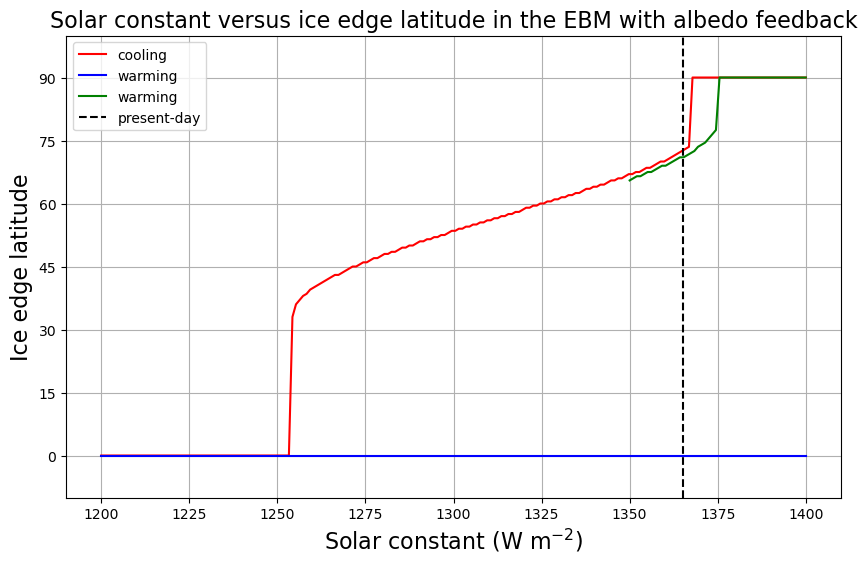

In [30]:
fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);

There are actually up to 3 different climates possible for a given value of $S_0$!

### How to un-freeze the Snowball

The graph indicates that if the Earth were completely frozen over, it would be perfectly happy to stay that way even if the sun were brighter and hotter than it is today.

Our EBM predicts that (with present-day parameters) the equilibrium temperature at the equator in the Snowball state is about -33ºC, which is much colder than the threshold temperature $T_f = -10^\circ$C. How can we melt the Snowball?

We need to increase the avaible energy sufficiently to get the equatorial temperatures above this threshold! That is going to require a much larger increase in $S_0$ (could also increase the greenhouse gases, which would have a similar effect)!

Let's crank up the sun to 1830 W m$^{-2}$ (about a 35% increase from present-day).

Integrating for 3600 steps, 14609.688000000002 days, or 40 years.
Total elapsed time is 4044.99999997769 years.
The ice edge is at [-0.  0.] degrees latitude.


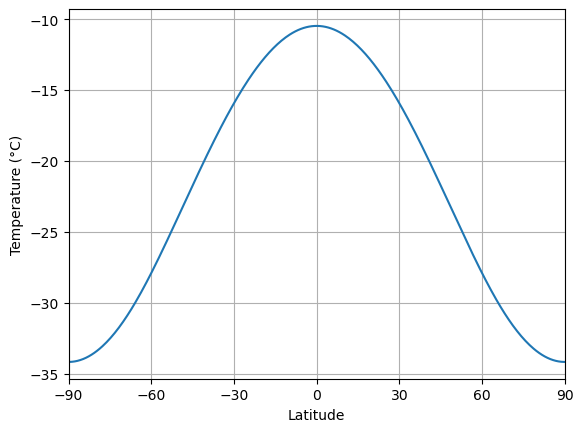

In [31]:
my_ticks = [-90,-60,-30,0,30,60,90]

model4 = climlab.process_like(model2)  # initialize with cold Snowball temperature
model4.subprocess['insolation'].S0 = 1830.
model4.integrate_years(40)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature (°C)'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks)
print('The ice edge is at ' + str(model4.icelat) + ' degrees latitude.' )

Still a Snowball... but just barely! The temperature at the equator is just below the threshold.

Try to imagine what might happen once it starts to melt. The solar constant is huge, and if it weren't for the highly reflective ice and snow, the climate would be really really hot!

We're going to increase $S_0$ one more time...

Integrating for 900 steps, 3652.4220000000005 days, or 10 years.
Total elapsed time is 4054.999999977441 years.


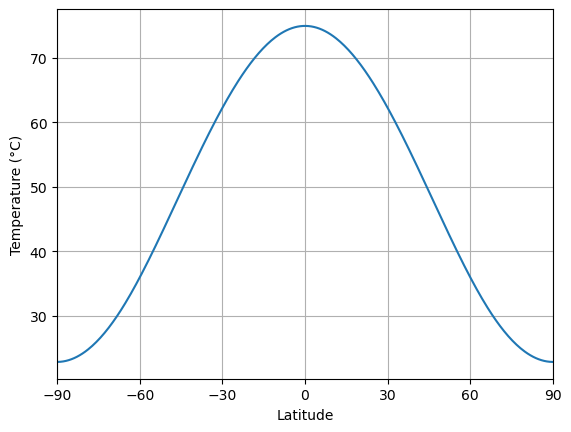

In [32]:
model4.subprocess['insolation'].S0 = 1840.
model4.integrate_years(10)
plt.plot(model4.lat, model4.Ts)
plt.xlim(-90,90); plt.ylabel('Temperature (°C)'); plt.xlabel('Latitude')
plt.grid(); plt.xticks(my_ticks);

Suddenly the climate looks very very different again! The global mean temperature is

In [33]:
model4.global_mean_temperature()

array(57.73355447)

A roasty 58ºC, and the poles are above 20ºC. A tiny increase in $S_0$ has led to a very drastic change in the climate.

Now we will complete the plot of ice edge versus solar constant.

In [34]:
S0array_snowballmelt = np.linspace(1400., 1900., 50)
icelat_snowballmelt = np.empty_like(S0array_snowballmelt)
icelat_snowballmelt_cooling = np.empty_like(S0array_snowballmelt)

for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = S0array_snowballmelt[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt[n] = np.max(model2.icelat)
    
for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array_snowballmelt)[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt_cooling[n] = np.max(model2.icelat)

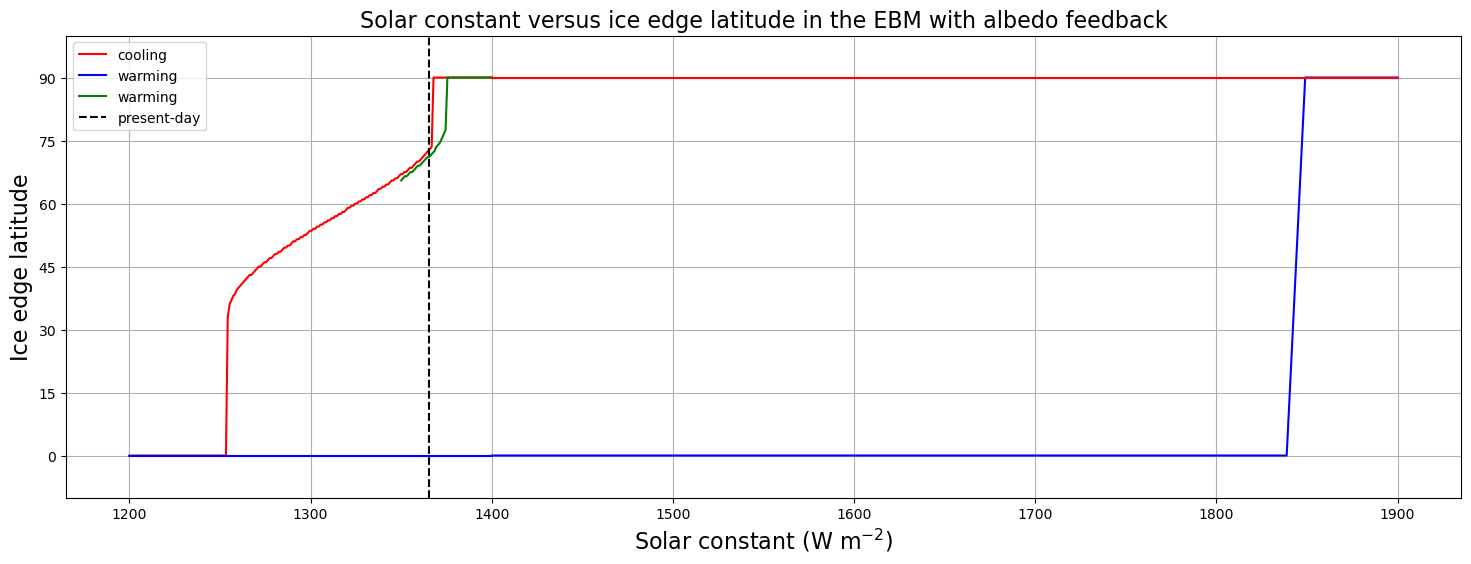

In [35]:
fig = plt.figure( figsize=(18,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt, 'b-' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt_cooling, 'r-' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16);

The upshot:

- For extremely large $S_0$, the only possible climate is a hot Earth with no ice.
- For extremely small $S_0$, the only possible climate is a cold Earth completely covered in ice.
- For a large range of $S_0$ including the present-day value, more than one climate is possible!
- Once we get into a Snowball Earth state, getting out again is rather difficult!

____________
## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/climlab/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________